In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import json

In [3]:
from collections import defaultdict

In [4]:
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    style='white', # стиль figure
    font_scale=3, # размер шрифта
    rc={
#         'lines.linewidth': 3, # ширина линий
        'text.usetex' : True # использовать tex
    } 
)

In [6]:
from visualization_utils import visualize

In [7]:
with open('data_new.pkl', 'rb') as f:
    results = pickle.load(f)

In [8]:
with open('viz_data_new.pkl', 'rb') as f:
    (X, Y) = pickle.load(f)

In [9]:
classes = defaultdict(list)
for i, y in enumerate(Y):
    tag = y.split('_')[-1][:-1]
    classes[tag].append(i)
classes

defaultdict(list,
            {'S2': [0,
              1,
              2,
              16,
              17,
              18,
              32,
              33,
              34,
              48,
              49,
              50,
              64,
              65,
              66,
              80,
              81,
              82,
              96,
              97,
              98,
              112,
              113,
              114,
              128,
              129,
              130,
              144,
              145,
              146,
              160,
              161,
              162,
              176,
              177,
              178,
              192,
              193,
              194,
              208,
              209,
              210,
              224,
              225,
              226,
              240,
              241,
              242],
             'C2': [3,
              4,
              5,
              19,
            

In [10]:
func_dirs = set([r['tag'] for r in results if r['tag'][-1] in ['X', 'Y', 'Z']])
func_dirs

{'C2X',
 'C2Y',
 'C2Z',
 'L2X',
 'L2Y',
 'L2Z',
 'S2X',
 'S2Y',
 'S2Z',
 'SS2X',
 'SS2Y',
 'SS2Z'}

In [11]:
funcs = set([r['tag'][:-1] for r in results if r['tag'][-1] in ['X', 'Y', 'Z']])
funcs

{'C2', 'L2', 'S2', 'SS2'}

In [12]:
def make_data(results):
    X, X_f, Y = [], [], []
    for r in results:
        X.append(np.array(r['x']).reshape(1, -1))
        X_f.append(np.array(r['exp_data']).reshape(1, -1))
        Y.append(r['dir_name'] + ' ' + r['tag'])
    X = np.concatenate(X, axis=0)
    X_f = np.concatenate(X_f, axis=0)
    return X, X_f, Y

In [13]:
def enumerate_stacks(Y):
    unique_labels = set([y.split(' ')[0] for y in Y])
    labels_map = {item: i + 1  for i, item in enumerate(sorted(unique_labels))}
    labels = []
    for y in Y:
        if ' ' not in y:
            stack, tag = y, ''
        else:
            stack, tag = y.split(' ', 1)
        labels.append('{stack} {tag}'.format(stack=labels_map[stack], tag=tag))
    return labels

In [14]:
from functools import cmp_to_key

def order_stacks(X, X_f, Y):
    def cmp(a, b):
        a = a[-1]
        b = b[-1]
        a, aa = a.split(' ', 1)
        a = int(a)
        b, bb = b.split(' ', 1)
        b = int(b)
        if (a > b) or ((a == a) and (aa > bb)):
            return 1
        elif (a == b) and (aa == bb):
            return 0
        else:
            return -1
        
    new_X, new_X_f, new_Y = [], [], []
    for x, x_f, y in sorted(zip(X, X_f, Y), key=cmp_to_key(cmp)):
#         print(x.shape)
        new_X.append(x.reshape(1, -1))
        new_X_f.append(x_f.reshape(1, -1))
        new_Y.append(y)
    return np.concatenate(new_X, axis=0), np.concatenate(new_X_f, axis=0), new_Y

In [15]:
import scipy as sp

In [16]:
import PIL

In [17]:
import scipy.misc

In [18]:
import os

In [19]:
files = os.listdir('CFs/1/results')

In [20]:
tag = 'L2'

In [21]:
filtered_images = []
for image in files:
    name, ext = os.path.splitext(image)
    if (tag in name) and (ext == '.png'):
        filtered_images.append(image)

In [22]:
ext

'.png'

In [23]:
import matplotlib.image as mpimg

img=mpimg.imread('CFs/1/results/L2X.png')

In [24]:
img.shape

(4000, 4000, 4)

Text(0.5, 1.0, 'gs[-1, -2]')

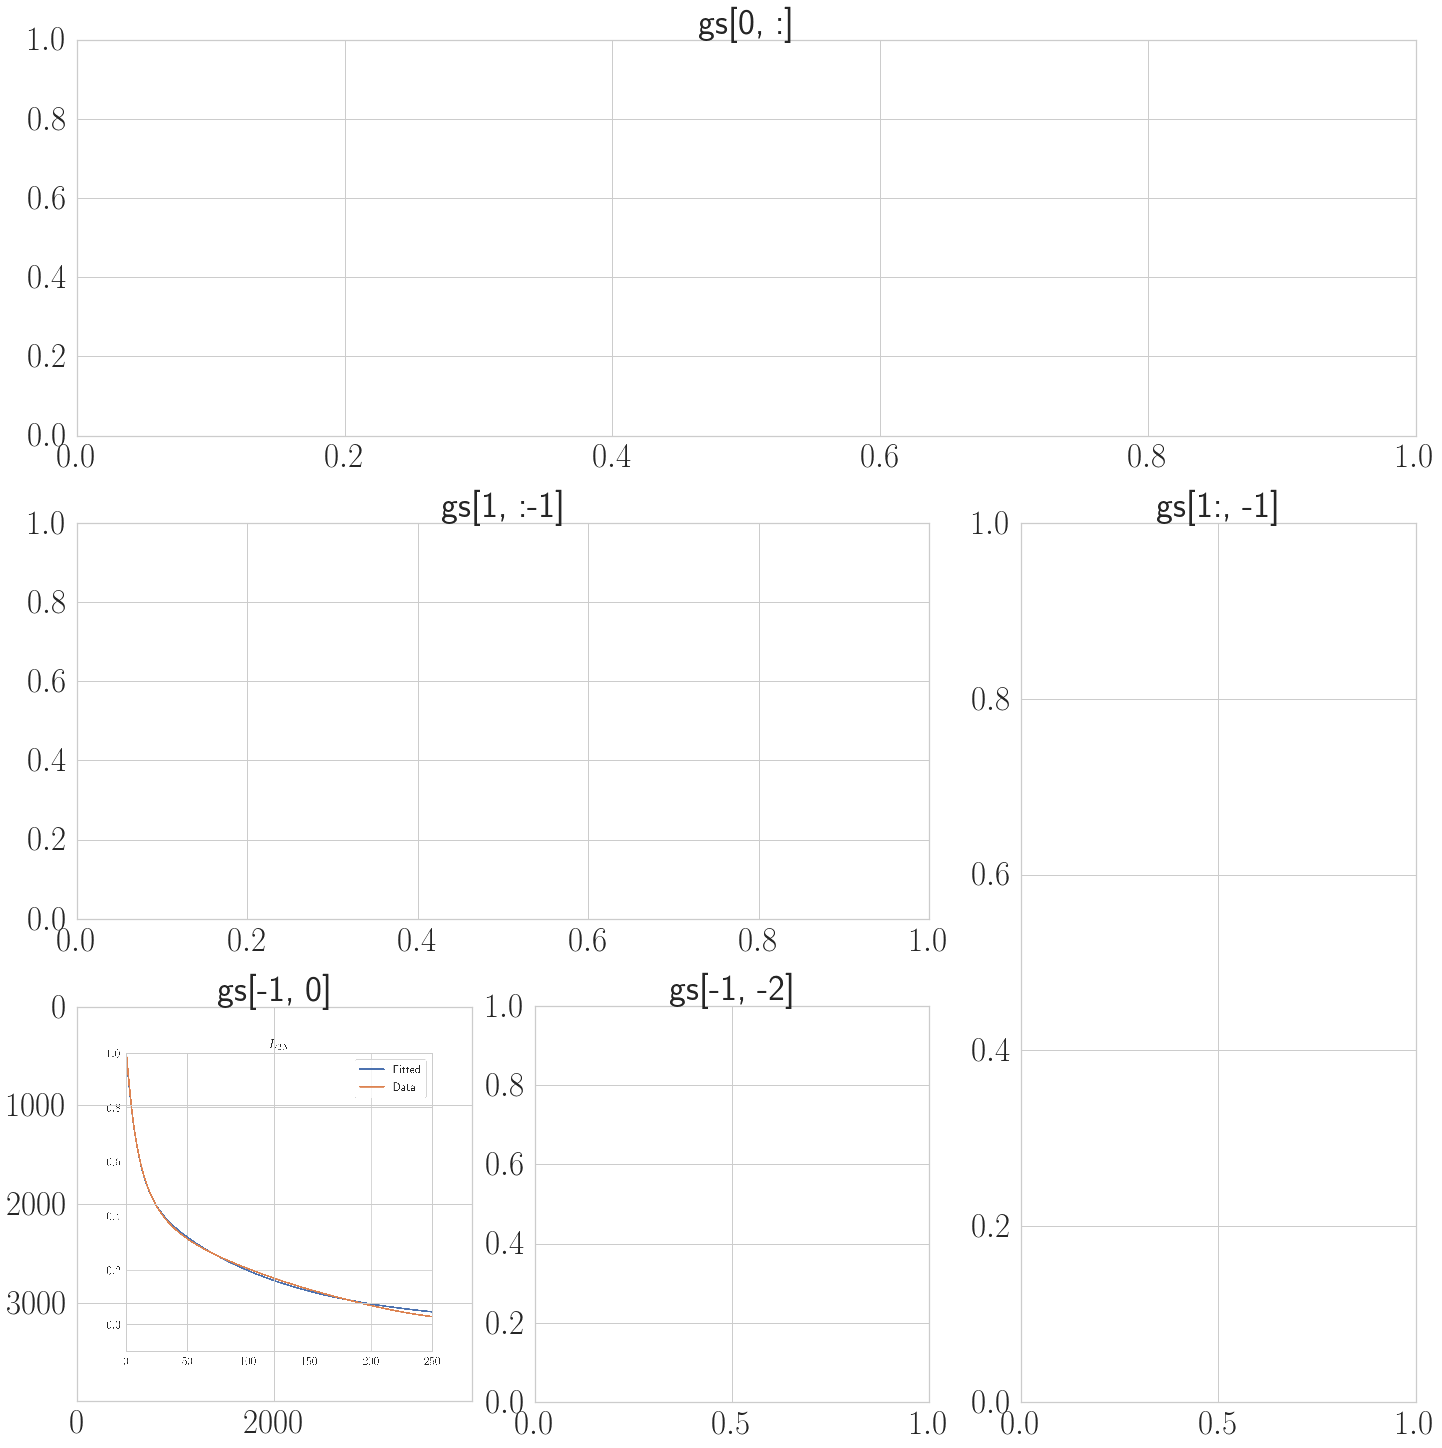

In [25]:
fig3 = plt.figure(constrained_layout=True, figsize=(20, 20))
gs = fig3.add_gridspec(4, 2)
f3_ax1 = fig3.add_subplot(gs[0, :])
f3_ax1.set_title('gs[0, :]')
f3_ax2 = fig3.add_subplot(gs[1, :-1])
f3_ax2.set_title('gs[1, :-1]')
f3_ax3 = fig3.add_subplot(gs[1:, -1])
f3_ax3.set_title('gs[1:, -1]')
f3_ax4 = fig3.add_subplot(gs[-1, 0])
f3_ax4.set_title('gs[-1, 0]')
f3_ax4.imshow(img)
f3_ax5 = fig3.add_subplot(gs[-1, -2])
f3_ax5.set_title('gs[-1, -2]')